# GRIP Task #1 - Prediction of Student Percentage

## Project by:       Sanju Hyacinth C



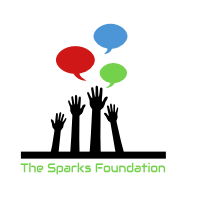

## Aim 
To establish the relationship between the variables and formulate a model to predict the student scores using hours of study/day.

## Dataset Outline
We are given a student data, with two attributes for this analysis - number of hours studied as the independent variable and percentage as the dependent variable. We are asked to predict the percentage of students by analysis the patterns with the number of hours. We have to, in this case find out the **predicted score or the percentage, if a student studies for 9.25 hours per day**. 

## Model used
We are using a **Supervisied Machine Learning Algorithm - Linear Regression**, for this prediction since the dependent variable is numeric in nature. And since we have just one independent variable, it is a **Simple Linear Regression model**. We will use the **scikit-learn** library in Jupyter notebook for this prediction analysis.

Let us load the _pyforest_ library just so we know we have all the needed Data Science libraries are always present in our work environment without having to remember any.

In [1]:
# pip install pyforest
# from pyforest import *

lazy_imports()

['from sklearn.model_selection import train_test_split',
 'from sklearn.preprocessing import OneHotEncoder',
 'import awswrangler as wr',
 'import plotly.express as px',
 'import tqdm',
 'import pydot',
 'import sys',
 'import re',
 'import xgboost as xgb',
 'import spacy',
 'import plotly as py',
 'import datetime as dt',
 'import plotly.graph_objs as go',
 'import matplotlib.pyplot as plt',
 'import pandas as pd',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import seaborn as sns',
 'import bokeh',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import tensorflow as tf',
 'import pickle',
 'import os',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import dash',
 'import sklearn',
 'from sklearn.manifold import TSNE',
 'from dask import dataframe as dd',
 'import matplotlib as mpl',
 'import altair as alt',
 'from pyspark import SparkContext',
 'from openpyxl import load_workbook',

In [2]:
# Additional libraries we need for analysis:

from sklearn.model_selection import train_test_split   # Subsetting data
from sklearn.linear_model import LinearRegression      # Model building
from sklearn import metrics                            # Model evaluation
from sklearn.metrics import r2_score                   # model efficiency


#### Let us look into the dataset we are provided with, the description of the independent and dependent (target) variables for analysis

## <center>Data Description</center>

<table>
    <tr>
        <td><b><center>Variable</center></b></td>
        <td><b><center>Definition</center></b></td>
    </tr>
    <tr>
        <td><center>Hours</center></td>
        <td>Number of hours the student studies (Independent variable - X)<td>
    </tr>
    <tr>
        <td><center>Scores</center></td>
        <td>The percentage of the student (Target variable - y)<td>
    </tr>
</table>

         
## TABLE OF CONTENTS:

* **A. Exploratory Data Analysis**
     1. Data Summary (EDD) & Inference
     2. Data Visualization: 
        _a. Distance plot & Inference_
        _b. Scatter plot & Inference_
        
        
* **B. Data Modelling**
     1. Data Splitting
     2. Model Creation & Interpretation
     3. Model Prediction
     4. Model Evaluation
     5. Score Prediction


# A. Exploratory Data Analysis

Let us now get going with the student data loading and analysis. In this section, we will see a summary of the data, visualize them for insights and then consolidate our inferences from the same.

## 1. Data Summary (EDD)

We will see the data loading and the data summary in this part of exploratory analysis.

In [3]:
dsba1 = pd.read_csv("dsba_1 - Sheet1.csv")
print("Dataset loaded successfully")

<IPython.core.display.Javascript object>

Dataset loaded successfully


In [4]:
print("The top five entries of the Student Data: ")
dsba1.head()

The top five entries of the Student Data: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print("The bottom five entries of the Student Data: ")
dsba1.tail()

The bottom five entries of the Student Data: 


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
print("Shape of the dataset: ", dsba1.shape)

print("The dataset has 2 attributes and 25 entries in each attribute")

Shape of the dataset:  (25, 2)
The dataset has 2 attributes and 25 entries in each attribute


In [7]:
# names of columns

print("Column names: ") 
dsba1.columns

Column names: 


Index(['Hours', 'Scores'], dtype='object')

In [8]:
dsba1.info()

# The datatypes are float and integer for hours and scores respectively. 
# We will have to convert the datatype of scores to float since the predicted score can bear decimals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# converting tagret variable to float:

dsba1.Scores = dsba1.Scores.astype('float64')

In [10]:
dsba1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


In [11]:
print("Summary of the dataset:")

dsba1.describe()

Summary of the dataset:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Inference:

From the summary of the attributes, we can confirm that

* There are no missing values present in the dataset since the count is 25 for both attributes
* We can say that the data does not carry many outliers because the mean and median (50%) values are not far apart

## 2. Data Visualization 

In this part of the analysis, we will try to visualise the dataset using plots and graphs. We shall firstly do distribution charts and then a sctter plot to establish the relationship between the dependent and independent variables

### a. Distance plot:

Since being numeric data, let us first examine the distribution (histogram) of both the study hours and scores of the students separately to see the spread of the data. This will give us a picture of the spread or skewness of the variable, if there is any or help us ascertain if it is a normal distribution. We will make use of the **distplot** function from the **seaborn library** to do this. The bins are set at 20, to better understand the distribution.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

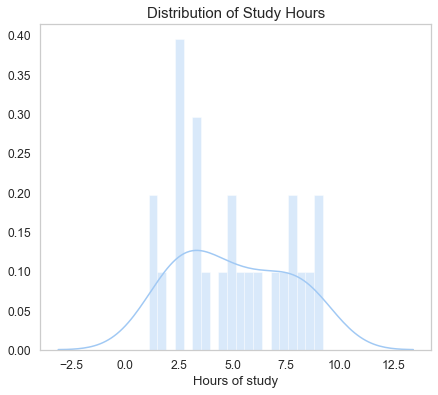

In [12]:
sns.set(style='whitegrid', palette="pastel", font_scale=1.1, rc={"figure.figsize": [7, 6]})
sns.distplot(dsba1['Hours'], norm_hist=False, bins=20 )
plt.title('Distribution of Study Hours', fontsize = 15)
plt.xlabel('Hours of study')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

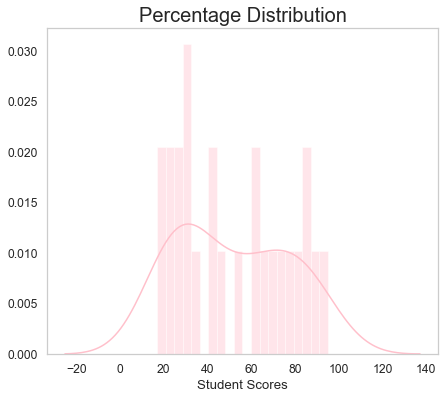

In [13]:
sns.set(style='whitegrid', palette="pastel", font_scale=1.1, rc={"figure.figsize": [7, 6]})
sns.distplot(dsba1['Scores'], norm_hist=False, bins=20, color='pink')
plt.title('Percentage Distribution', fontsize = 20)
plt.xlabel('Student Scores')
plt.grid()
plt.show()

### Inference:

* There is no significant skewness found in the graphs
* The highest peaks are at 2.5 hrs and close to 30% score
* The density curves suggest that the study hours seem more consistent that the scores which seem to show a clear dip, may state that students either score low or high but not in between.


### b. Scatter Plot:

We are now using the scatter plot to see the extent of relationship between the two variables, since we have already found out some similarities between them. We are also going to fit a **regression line** along with the scatter plot just to see the fit.
For this we use the **lmplot** that fits a best-fit linear regression line along with a **95% confidence interval** band that the population regression line will lie within the interval.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

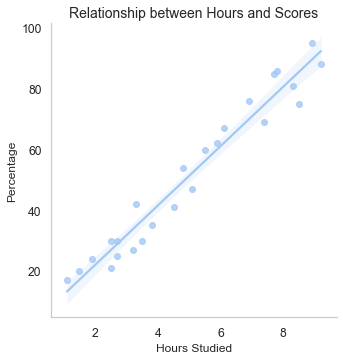

In [14]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.lmplot(x="Hours", y="Scores", data=dsba1)
plt.title('Relationship between Hours and Scores', fontsize=14)  
plt.xlabel('Hours Studied', fontsize=12)  
plt.ylabel('Percentage', fontsize=12)
plt.grid()
plt.show()

### Inference:

This plot shows that there is a **direct positive relationship** between the two variables, as an increase in the independent variables (Hours) brings a significant increase in the dependent variable (Scores). This scatter plot with the regression line was used to bring in a best-fit line in an attempt to minimise errors.


# B. Data Modelling

We come to the next stage of the analysis, which is the data modeling. This involves the below steps:

* Data Splitting
* Model Fitting
* Model Evaluation


## 1. Data Splitting:

We start by splitting our dataset into **train and validation data** in order to effectively train and validate the model's performance. For this we use the **train_test_split** function from the scikit-learn library. By this, we can split the data into 4 subsets: training and validation dataset with X and y separately. 

In [15]:
X = dsba1.iloc[:, :-1].values  
y = dsba1.iloc[:, 1:].values  

We are assigning our independent variable to X and our dependent variable to y. 

We are using the **index locator** function - iloc. This helps us assign the attributes using their corresponding index positions. 

* For X, we are taking all the rows while leaving out the last column. **:-1** means that we are taking columns from 0 through second last column that is represented as -1.
* For y, we are simply taking only the last column (1 in this case since we have only 2 attributes) and all the rows of course.

Now, we are splitting the data from X and y to training and validation sets, giving us 4 subsets. It is important to set the same **random state** to a specific number for reproduceability. We are taking 0 here and the test split as 0.25% of the data.


In [16]:
# DATA SPLITTING:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0) 

In [17]:
# Shape of the split datasets:

print("Shape of datasets: ")
X_train.shape,  X_val.shape,  y_train.shape,  y_val.shape

Shape of datasets: 


((18, 1), (7, 1), (18, 1), (7, 1))

In [18]:
# Viewing X_train

X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

Let us now train our Linear Regression Algorithm on the X_train data. Evaluate its results on the X_val and then test the same on our y_train and y_val dataset.

## 2. Model Creation: 

Let us import the **LinearRegression** function from the scikit-learn library to fit the linear regression model to the dataset. We are fitting the model onto the X_train and y_train dataset

In [19]:
# LINEAR REGRESSION 

regr = LinearRegression()  

regr.fit(X_train, y_train) 
print("The data training is complete")

The data training is complete


Now that our model, regr is trained, let's have a quick view of the model scores, **coefficient and intercept** 

In [20]:
print("Coefficients: ", regr.coef_[0][0])
print("Intercept: ", regr.intercept_[0])

Coefficients:  9.941678339488096
Intercept:  1.932204253151646


### Model Interpretation 

From our model of the form **y = mX + c**,

m (coefficient) = 9.9417

c (intercept)   = 1.9322  

Coefficient m is the effect of X on y. And intercept c is the point where the line passes through y axis when X=0. This is otherwise known as the bias component in the formula that remains a constant for the equation.

An increase/decrease in 1 unit of the independent variable (hour), increases/decreases the target variable by **9.9 units**, meaning if a student increases/decreases his/her study hours by 1, his score goes up/down by 9.9% .


## 3. Model Prediction:

Let us test the efficiency of the model's prediction on the validation set, X_val. Upon doing so, we will also compare the results with y_val as well. For that we will plot them together to find how close the prediction has been made.

In [21]:
# predicting y for the validation set:

predict_y = regr.predict(X_val)

We are now taking a look at the **r squared value**, regression score function. This gives us a score between 0 and 1 of how strong the true y value and the predicted ones correlate. For this test, we use the **r2_score** from the **sklearn.metrics** library.

In [22]:
print("Train score: ", regr.score(X_train, y_train))
print("Test score: ", regr.score(X_val, y_val))

# Train = 0.95 (approx)
# Test = 0.94 (approx)

Train score:  0.9484509249326872
Test score:  0.9367661043365054


## 4. Model Evaluation:

We are now going to evaluate the accuracy of the model by using the below model accuracy metrics

* Mean Absolute Error **(MAE)**
* Mean Squared Error **(MSE)**
* Root Mean Squared Error **(RMSE)**

In [24]:
# Evaluating the accuracy using evaluation metrics:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, predict_y))
print('Mean Squared Error: ', metrics.mean_squared_error(y_val, predict_y))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_val, predict_y)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error:  20.33292367497997


<IPython.core.display.Javascript object>

Root Mean Squared Error:  4.5092043283688055


Both the Mean Absolute Error and Root Mean Squared Error are almost in line, but we are choosing the MAE which has given the best result.

#### Let us compare the model's prediction accuracy with the original scores of the students.


In [25]:
compr = pd.DataFrame({'Actual': y_val.flatten(), 'Predicted': predict_y.flatten()})
compr

<IPython.core.display.Javascript object>

,Actual,Predicted
0,20.0,16.844722
1,27.0,33.745575
2,69.0,75.500624
3,30.0,26.786400
4,62.0,60.588106
5,35.0,39.710582
6,24.0,20.821393


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

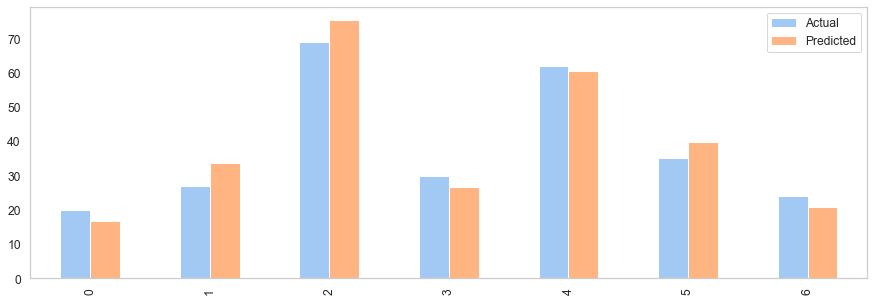

In [26]:
# Graphical representation

compr.plot(kind='bar')
plt.grid()
plt.show()

## 5. Score Prediction:

We are asked to find out the students' score if he/she studies for 9.25 hours a day

In [27]:
hrs = [[9.25]]
pred_hrs = regr.predict(hrs)
print("No of Hours: ", hrs)
print("Predicted Score: ", pred_hrs[0])


No of Hours:  [[9.25]]
Predicted Score:  [93.89272889]


Let us try our hand at predicting the score for 9.5 hours and see the increase in score

In [28]:
# Testing for 9.5 hours of study

hrs2 = [[9.5]]
pred_hrs2 = regr.predict(hrs2)
print("No of Hours: ", hrs2)
print("Predicted Score: ", pred_hrs2[0])


No of Hours:  [[9.5]]
Predicted Score:  [96.37814848]


In [29]:
# difference of scores with 15 min increase in study:

diff = pred_hrs2-pred_hrs

print("Score increase with 15 minutes more study = ", diff[0])


Score increase with 15 minutes more study =  [2.48541958]


From this predictive analysis of the student scores data using simple linear regression, we have xplained the following

* Visualise the **degree of relationship** between the independent and dependent variable
* Find out the **coefficient (m)** of the independent variable and the **intercept (c)** for prediction
* Evaluated the model's accuracy using **performance metrics**. The best result was given by **MAE = 4.13**
* R squared value is found to be 0.936 
* **Predicted** the score of the student with 9.25 study hrs/day


# <center>THE END</center>

<center>Project done by Sanju Hyacinth C</center>